In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import os
import operator
import ast
import pickle
import seaborn as sns 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from keras.utils import np_utils
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix
from timeit import default_timer as timer

num_letras = 27

Using TensorFlow backend.
c:\users\cesar\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\cesar\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\cesar\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [ ]:
# Mini dataset

# X_train = pd.read_csv("mini_dataset_train.csv")
# X_val = pd.read_csv('mini_dataset_validation.csv')

# X_train = X_train.iloc[:,1:31]
# X_val = X_val.iloc[:,1:31]

# y_train = np.loadtxt("labels_train.csv", delimiter=",")
# y_val = np.loadtxt("labels_validation.csv", delimiter=",")

In [ ]:
# Dataset de testes

# X_test = pd.read_csv("mini_dataset_test.csv")

# y_test = X_test.iloc[:,31]
# X_test = X_test.iloc[:, 1:31]

# X_test = X_test/16384

# y_test = LabelEncoder().fit_transform(y_test)
# y_test = np_utils.to_categorical(y_test, 27)

In [2]:
X_train = pd.read_csv("dataset_train.csv")
X_val = pd.read_csv('dataset_validation.csv')
X_test = pd.read_csv('dataset_test.csv')

X_train = X_train.iloc[:,1:31]
X_val = X_val.iloc[:,1:31]
X_test = X_test.iloc[:,1:31]

y_train = np.loadtxt("labels_train.csv", delimiter=",")
y_val = np.loadtxt("labels_validation.csv", delimiter=",")
y_test = np.loadtxt("labels_test.csv", delimiter=",")

In [3]:
acc = []
x = []
k = 1
# for k in range(1,40, 2):
print(k)
classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
classifier.fit(X_train, y_train)
start_time = timer()
y_pred = classifier.predict(X_test)
delta_time = timer() - start_time
print("--- %s milliseconds ---" % (delta_time/1000))
score = classifier.score(X_test, y_test)
acc.append(score)
x.append(k)
# dic = {'x': x, 'y': acc}
# with open('knn/knn_todos_dados_treino.pickle', 'wb') as fp:
#     pickle.dump(dic, fp, protocol=pickle.HIGHEST_PROTOCOL)

1
--- 0.010090604599999999 milliseconds ---


NameError: name 'k' is not defined

In [4]:
score

0.9991111111111111

In [ ]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(x, acc, linestyle=':', marker='.')
plt.ylabel('Acurácia')
plt.xlabel('K (nº de vizinhos)')
plt.title('KNN / Teste / Todos os dados de treinamento')
plt.grid()
plt.show()

In [ ]:
def get_medias_letras():
    
    directory = 'estatisticas'
    letras_repetidas = os.listdir(directory)
    
    estatisticas = pd.DataFrame()
    for arq in letras_repetidas:
        l = arq.split('_')[0]
        tmp = pd.read_excel(directory+"/"+arq).reset_index(drop=True)
        tmp = tmp.iloc[:,1].transpose().reset_index(drop=True)
        tmp['label'] = l
        estatisticas = estatisticas.append(tmp, ignore_index=True)
    return estatisticas

def get_X_y_train_medias():
    media_letras = get_medias_letras()

    y_train = media_letras.iloc[:,30]
    X_train = media_letras.iloc[:, 0:30]

    X_train = X_train/16384

    y_train = LabelEncoder().fit_transform(y_train)
    y_train = np_utils.to_categorical(y_train, num_letras)
    
    return X_train, y_train

In [ ]:
X_train, y_train = get_X_y_train_medias()

In [ ]:
# Aplica KNN com as médias obtidas de todos os dados

acc = []
x = []
for k in tqdm.tqdm(range(1,51)):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = classifier.score(X_test, y_test)
    acc.append(score)
    x.append(k)

In [ ]:
dic = {'x': x, 'y': acc}
with open('knn/knn_dados_medias.pickle', 'wb') as fp:
        pickle.dump(dic, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(x, acc, linestyle=':', marker='.')
plt.ylabel('Acurácia')
plt.xlabel('K')
plt.title('KNN / Teste / Todos os dados de treinamento')
plt.grid()
plt.show()

In [17]:
# Aplica KNN com os clusters obtidos do KMeans
# acc = []
# x = []
for n_centers in range(27,271,27):
    centroides = np.loadtxt("k-means centroides/por_letra/"+str(n_centers)+"_clusters.csv", delimiter=",")
    if not len(centroides.shape)==2:
        centroides = np.expand_dims(centroides,axis=0)
    _X_train = centroides
    _y_train = np.loadtxt("k-means centroides/por_letra/"+str(n_centers)+"_labels_knn-kmeans.csv", delimiter=",")

    # print(n_centers, X_train.shape, y_train.shape)
    knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
    start_time = timer()
    classifier = knn.fit(_X_train, _y_train)
    print(n_centers)
    y_pred = classifier.predict(X_test)
    delta_time = timer() - start_time
    print("--- %s milliseconds ---" % (delta_time/1000))
#     score = classifier.score(X_test, y_test)
#     print(score)
    # acc.append(score)
    # x.append(n_centers)

27
--- 0.009092895099998714 milliseconds ---
54
--- 0.009784745299999486 milliseconds ---
81
--- 0.008866160699999454 milliseconds ---
108
--- 0.009458109100000002 milliseconds ---
135
--- 0.009096096000001126 milliseconds ---
162
--- 0.009040527200002544 milliseconds ---
189
--- 0.00909793830000126 milliseconds ---
216
--- 0.00812664230000155 milliseconds ---
243
--- 0.008688576199998351 milliseconds ---
270
--- 0.008437160699999367 milliseconds ---


In [ ]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(x, acc, linestyle=':', marker='.')
plt.ylabel('Acurácia')
plt.xlabel('K clusters no K-Means')
plt.title('KNN / Teste / Utilizando K-Means')
plt.grid()
plt.show()

In [10]:
y_pred = classifier.predict(X_test)
y_true = [i.argmax() for i in y_test]
y_pred2 = [i.argmax() for i in y_pred]

In [11]:
cm = confusion_matrix(y_true, y_pred2)

Text(0.5, 1.0, 'KNN / Teste / Utilizando K-Means')

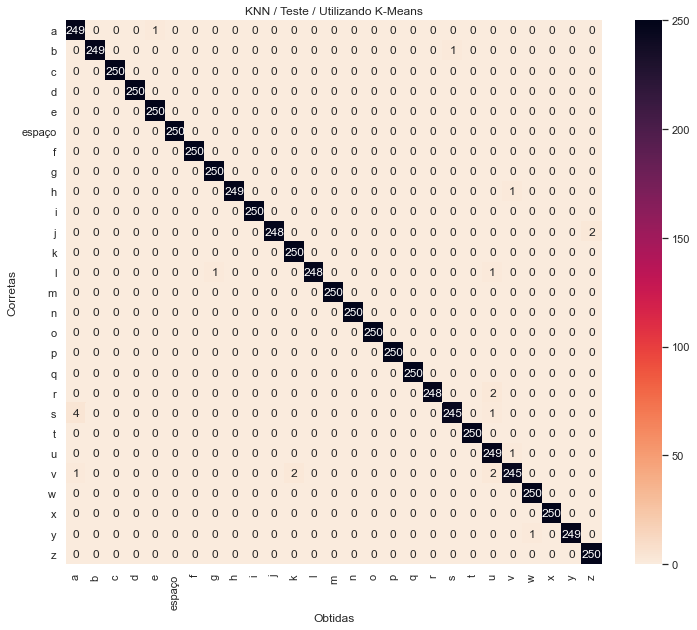

In [12]:
labels = ['a', 'b', 'c', 'd', 'e', 'espaço', 'f', 'g', 'h', 'i', 'j', 'k', 
          'l', 'm', 'n', 'o',
          'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

sns.set()
fig, ax = plt.subplots(figsize=(12,10))
# ax.set_title('KNN / Teste / Utilizando K-Means')
ax = sns.heatmap(cm, xticklabels=labels, yticklabels=labels, ax=ax, cmap=sns.cm.rocket_r, annot=True, fmt="d")
ax.set_ylabel('Corretas')
ax.set_xlabel('Obtidas')
ax.set_title('KNN / Teste / Utilizando K-Means')


In [15]:
# Matriz de confusão com todos os dados

classifier = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_true = [i.argmax() for i in y_test]
y_pred2 = [i.argmax() for i in y_pred]
cm = confusion_matrix(y_true, y_pred2)

Text(0.5, 1.0, 'KNN / Teste / Utilizando Todos os dados')

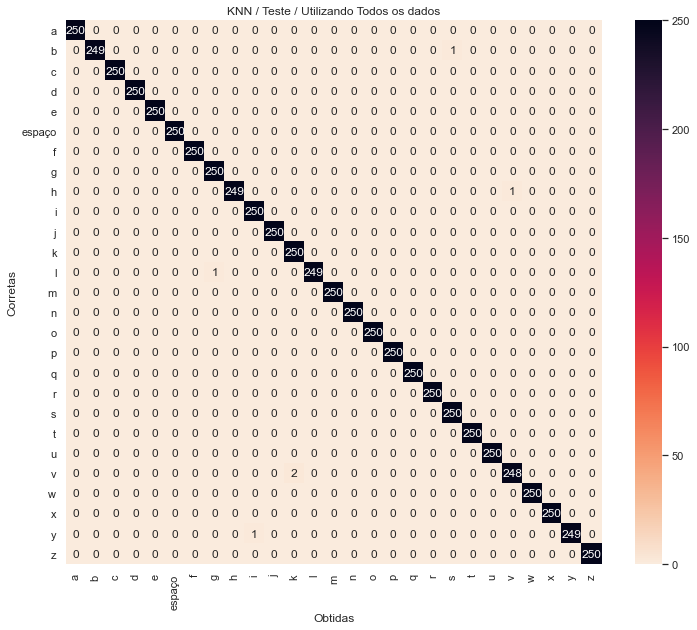

In [16]:
labels = ['a', 'b', 'c', 'd', 'e', 'espaço', 'f', 'g', 'h', 'i', 'j', 'k', 
          'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

sns.set()
fig, ax = plt.subplots(figsize=(12,10))
ax = sns.heatmap(cm, xticklabels=labels, yticklabels=labels, ax=ax, cmap=sns.cm.rocket_r, annot=True, fmt="d")
ax.set_ylabel('Corretas')
ax.set_xlabel('Obtidas')
ax.set_title('KNN / Teste / Utilizando Todos os dados')

In [18]:
class KNN():
    
    def __init__(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.prediction = None
    
    def euclidean(self, x1, x2):
        assert len(x1) == 30
        assert len(x2) == 30
        d_tmp = 0
        for i in range(30):
            d_tmp += pow((x1[i]-x2[i]),2)
        return d_tmp
    
    def predict(self, X_test):
        d_min = []
        y_min = []
        for j in range(len(X_test)):
            for i in range(len(X_train)):
                d = self.euclidean(X_test.iloc[j], X_train.iloc[i])
                if len(d_min)==j:
                    d_min.append(d)
                    y_min.append(y_train[i])
                if d<d_min[j]:
                    d_min[j]=d
                    y_min[j] = y_train[i]
        self.prediction = y_min
        return y_min
    
    def score(self, X_test, y_test):
        if not self.prediction:
            predicao = self.predict(X_test)
        else:
            predicao = self.prediction
        errors = 0
        for p in range(len(y_test)):
            if not list(y_test[p]) == list(predicao[p]):
                errors += 1
        return 1-errors/len(y_test)

In [20]:
import operator

class KNN(object):

    def __init__(self, k=3):
        self.k = k

    def fit(self, x, y):
        self.x = x
        self.y = y

    def _square_distance(self, v1, v2):
        return np.sum(np.square(v1-v2))

    def _vote(self, ys):
        ys_unique = np.unique(ys)
        vote_dict = {}
        for y in ys:
            argmax = y.argmax()
            if argmax not in vote_dict.keys():
                vote_dict[argmax] = 1
            else:
                vote_dict[argmax] += 1
        sorted_vote_dict = sorted(vote_dict.items(), key=operator.itemgetter(1), reverse=True)
        return sorted_vote_dict[0][0]

    def predict(self, x):
        y_pred = []
        for i in range(len(x)):
            dist_arr = [self._square_distance(x[i], self.x[j]) for j in range(len(self.x))]
            sorted_index = np.argsort(dist_arr)
            top_k_index = sorted_index[:self.k]
            y_pred.append(self._vote(ys=self.y[top_k_index]))
        return np.array(y_pred)

    def score(self, y_true=None, y_pred=None):
        if y_true is None and y_pred is None:
            y_pred = self.predict(self.x)
            y_true = self.y
        score = 0.0
        for i in range(len(y_true)):
            if y_true[i] == y_pred[i]:
                score += 1
        score /= len(y_true)
        return score

In [ ]:
# Todos os dados
knn_predictor = KNN()
knn_predictor.fit(X_train.to_numpy(), y_train)
start_time = timer()
predicao = knn_predictor.predict(X_test.to_numpy())
delta_time = timer() - start_time
print("--- %s seconds ---" % (delta_time))

In [ ]:
a = y_test[0]

In [3]:
# K-Means
for n_centers in range(27,271,27):
    print(n_centers)
    centroides = np.loadtxt("k-means centroides/por_letra/"+str(n_centers)+"_clusters.csv", delimiter=",")
    if not len(centroides.shape)==2:
        centroides = np.expand_dims(centroides,axis=0)
    _X_train = centroides
    _y_train = np.loadtxt("k-means centroides/por_letra/"+str(n_centers)+"_labels_knn-kmeans.csv", delimiter=",")
    
    knn_predictor = KNN(_X_train, _y_train)
    start_time = timer()
    predicao = knn_predictor.predict(X_test)
    delta_time = timer() - start_time
    print("--- %s milliseconds ---" % (delta_time/1000))
# score = knn_predictor.score(X_test, y_test)

27


NameError: name 'KNN' is not defined

In [ ]:
# KNN com K-Means
X_train_total = []
y_train_total = []
for i,letra in enumerate(letras):
    kmeans = KMeans(n_clusters = 10)
    kmeans.fit(dataset[dataset.label==letra].iloc[:,:30])

    X_train = kmeans.cluster_centers_
    X_train_total.append(X_train)    
    
    y_train = LabelEncoder().fit_transform([i]*10)
    y_train = np_utils.to_categorical(y_train, 27)
    y_train_total.append(y_train)

X_test = mini_dataset_test.iloc[:,:30]
y_test = LabelEncoder().fit_transform(mini_dataset_test.iloc[:,30])
y_test = np_utils.to_categorical(y_test, 27)

knn_predictor = KNN(X_train_total, y_train_total)
predicao = knn_predictor.predict(X_test)

erros= 0
for pred in predicao:
    if list(pred) == list(y_test):
        erros += 1

In [ ]:
X_train, y_train = get_X_y_train_medias()